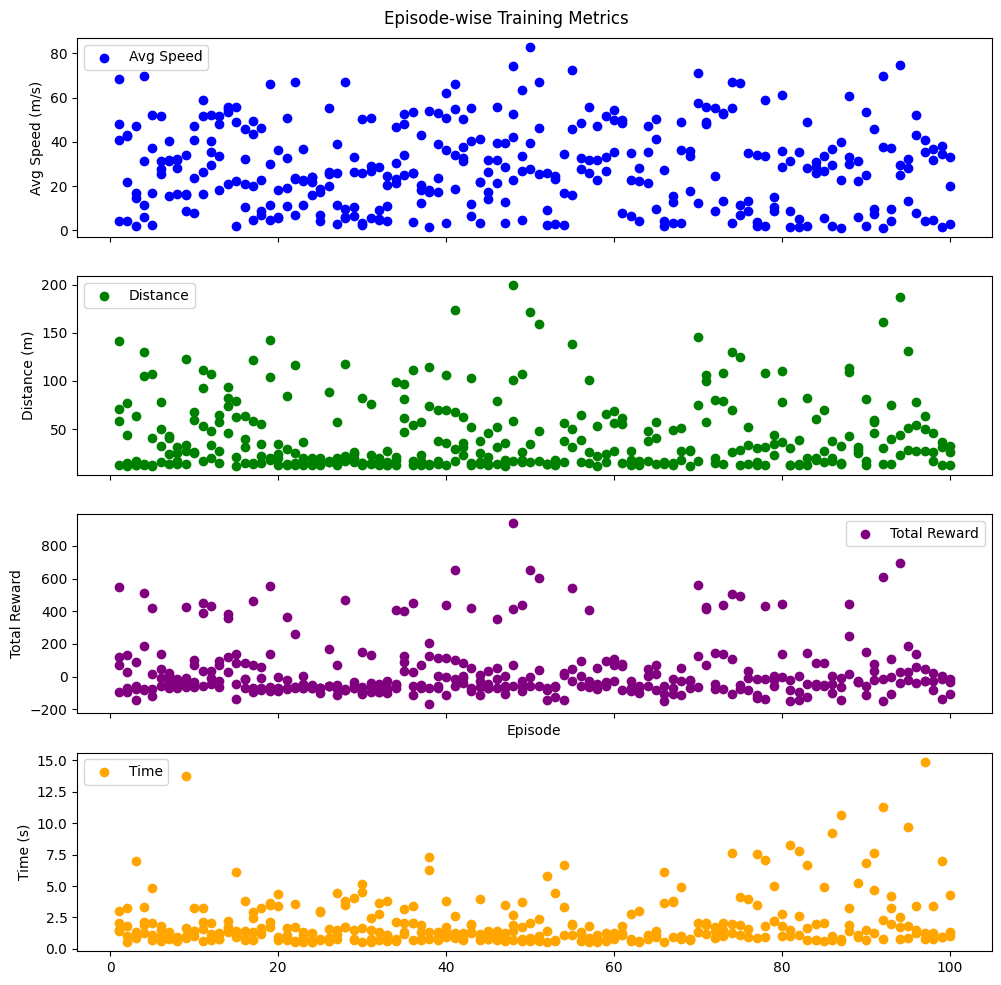

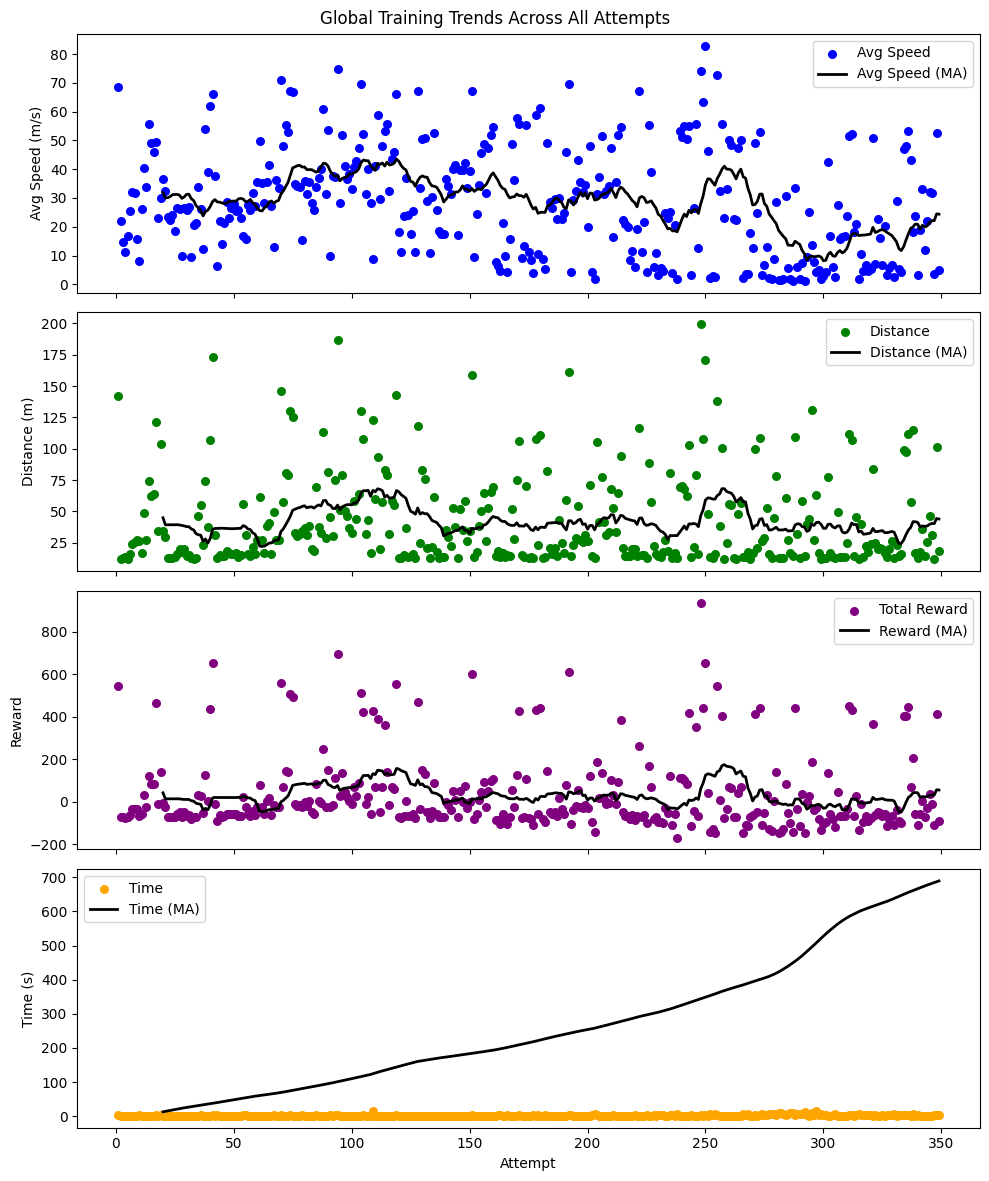

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# df = pd.read_csv("fresh.csv")  # REPLACE with your actual path
df = pd.read_csv("changes.csv")  # REPLACE with your actual path

# Optional: ensure columns are stripped and normalized
df.columns = [col.strip() for col in df.columns]

# Cumulative time column (for plotting over real time)
df["Elapsed Time (s)"] = df["Time (s)"].cumsum()

df["Attempt"] = range(1, len(df) + 1)

df["Reward MA"] = df["Total Reward"].rolling(window=20).mean()
df["Distance MA"] = df["Distance (m)"].rolling(window=20).mean()
df["Avg Speed MA"] = df["Avg Speed (m/s)"].rolling(window=20).mean()
df["Time MA"] = df["Elapsed Time (s)"].rolling(window=20).mean()

# ----------------------
# Plot 1: Metrics vs Episode
# ----------------------
fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)

axs[0].scatter(df["Episode"], df["Avg Speed (m/s)"], label="Avg Speed", color='blue')
axs[0].set_ylabel("Avg Speed (m/s)")
axs[0].legend()

axs[1].scatter(df["Episode"], df["Distance (m)"], label="Distance", color='green')
axs[1].set_ylabel("Distance (m)")
axs[1].legend()

axs[2].scatter(df["Episode"], df["Total Reward"], label="Total Reward", color='purple')
axs[2].set_ylabel("Total Reward")
axs[2].set_xlabel("Episode")
axs[2].legend()

axs[3].scatter(df["Episode"], df["Time (s)"], label="Time", color='orange')
axs[3].set_ylabel("Time (s)")
axs[3].legend()

plt.suptitle("Episode-wise Training Metrics")
plt.tight_layout()
plt.show()

# ----------------------
# Plot 2: Metrics vs Attempt Number
# ----------------------
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)


axs[0].scatter(df["Attempt"], df["Avg Speed (m/s)"], color='blue', label="Avg Speed", s=30)
axs[0].plot(df["Attempt"], df["Avg Speed MA"], color='black', label="Avg Speed (MA)", linewidth=2)
axs[0].set_ylabel("Avg Speed (m/s)")
axs[0].legend()

axs[1].scatter(df["Attempt"], df["Distance (m)"], color='green', label="Distance", s=30)
axs[1].plot(df["Attempt"], df["Distance MA"], color='black', label="Distance (MA)", linewidth=2)
axs[1].set_ylabel("Distance (m)")
axs[1].legend()

axs[2].scatter(df["Attempt"], df["Total Reward"], color='purple', label="Total Reward", s=30)
axs[2].plot(df["Attempt"], df["Reward MA"], color='black', label="Reward (MA)", linewidth=2)
axs[2].set_ylabel("Reward")
axs[2].legend()

axs[3].scatter(df["Attempt"], df["Time (s)"], color='orange', label="Time", s=30)
axs[3].plot(df["Attempt"], df["Time MA"], color='black', label="Time (MA)", linewidth=2)
axs[3].set_ylabel("Time (s)")
axs[3].set_xlabel("Attempt")
axs[3].legend()

plt.suptitle("Global Training Trends Across All Attempts")
plt.tight_layout()
plt.show()
